This script conducts an in-depth exploratory data analysis on a worldwide wine dataset. The goal of the analysis is to reveal insights regarding wine production, quality, and pricing patterns across different geographical areas. Through the use of data visualization methods, the code investigates relations between countries, wine types, and regions, as well as pinpointing leading producers and top-rated wineries. The results from this examination can provide important information for stakeholders in the wine sector, including producers, investors, and consumers, providing a data-informed view of the global wine market trends and quality evaluations.

#### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Import the dataset

In [2]:
wine_df = pd.read_csv("wine.csv")

#### To get a better understanding of the dataset, view the shape, first few lines as well as the information pertaining to the data.

In [3]:
# View the shape
wine_df.shape

(1103, 11)

In [4]:
# View the general information regarding the data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1103 non-null   int64  
 1   country      1103 non-null   object 
 2   description  1103 non-null   object 
 3   designation  834 non-null    object 
 4   points       1103 non-null   int64  
 5   price        1046 non-null   float64
 6   province     1103 non-null   object 
 7   region_1     930 non-null    object 
 8   region_2     492 non-null    object 
 9   variety      1103 non-null   object 
 10  winery       1103 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 94.9+ KB


In [5]:
# View the first few entries of the data
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


### Data cleaning

#### Drop redundant columns

In [6]:
# Identify and remove columns
wine_df = wine_df.drop(columns=["Unnamed: 0", "description", "designation", "region_1", "region_2"])

In [7]:
# View the new shape
wine_df.shape

(1103, 6)

#### View the first few rows and shape of the dataset

In [8]:
wine_df.head()

,country,points,price,province,variety,winery
0,US,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,96,90.0,California,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Provence red blend,Domaine de la B√©gude


#### Identify NaN and duplicate values

#### Remove NaN values in price

In [9]:
# Count the NaN values in each column and display the values
total_wine_nan = wine_df.isna().sum()
print(f"""
Columns with total NaN values
{total_wine_nan}
      """)


Columns with total NaN values
country      0
points       0
price       57
province     0
variety      0
winery       0
dtype: int64
      


In [10]:
# Drop the NaN rows in price
wine_df = wine_df.dropna(subset="price")

In [11]:
# Count the NaN values in each column and display the values
total_wine_nan = wine_df.isna().sum()
print(f"""
Columns with total NaN values
{total_wine_nan}
      """)


Columns with total NaN values
country     0
points      0
price       0
province    0
variety     0
winery      0
dtype: int64
      


#### Convert data types

Check if there are any data in the price column with a decimal higher than "0".
If there are no prices with a decimal higher than "0" then convert the data type
to `int64`

In [12]:
# Create a boolean mask for prices with non-zero decimal parts
decimal_mask = (wine_df["price"] % 1) != 0

# Apply the mask and display results
prices_with_decimals = wine_df[decimal_mask]["price"]

if len(prices_with_decimals) > 0:
    print(f"There are {len(prices_with_decimals)} prices with decimal values greater than 0:")
else:
    print("There are no prices with decimal values greater than 0.")

There are no prices with decimal values greater than 0.


In [13]:
# Convert the price column to int64
wine_df["price"] = wine_df["price"].astype(np.int64)

In [14]:
# Check if the data type changed
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   1046 non-null   object
 1   points    1046 non-null   int64 
 2   price     1046 non-null   int64 
 3   province  1046 non-null   object
 4   variety   1046 non-null   object
 5   winery    1046 non-null   object
dtypes: int64(2), object(4)
memory usage: 57.2+ KB


### Data cleaning explanation

During the data cleaning process, I identified unnecessary columns and removed them. Additionally, I eliminated NaN values in the dataset, especially in the price column. This decision was made since rows containing NaN are considered incomplete and likely unreliable. This enhanced our dataset by focusing on the most significant variables for our analysis. Ultimately, the data type of the price was converted to int64 for efficiency in processing. These data-cleaning steps were essential in establishing a robust and suitable dataset for our analysis. By removing irrelevant information, addressing missing values, and altering data types, we've developed a more concentrated and dependable foundation for extracting insights into wine-related trends.

### Exploratory data analysis

In [15]:
# View the first few entries
wine_df.head()

,country,points,price,province,variety,winery
0,US,96,235,California,Cabernet Sauvignon,Heitz
1,Spain,96,110,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,96,90,California,Sauvignon Blanc,Macauley
3,US,96,65,Oregon,Pinot Noir,Ponzi
4,France,95,66,Provence,Provence red blend,Domaine de la B√©gude


#### Number of wines by country

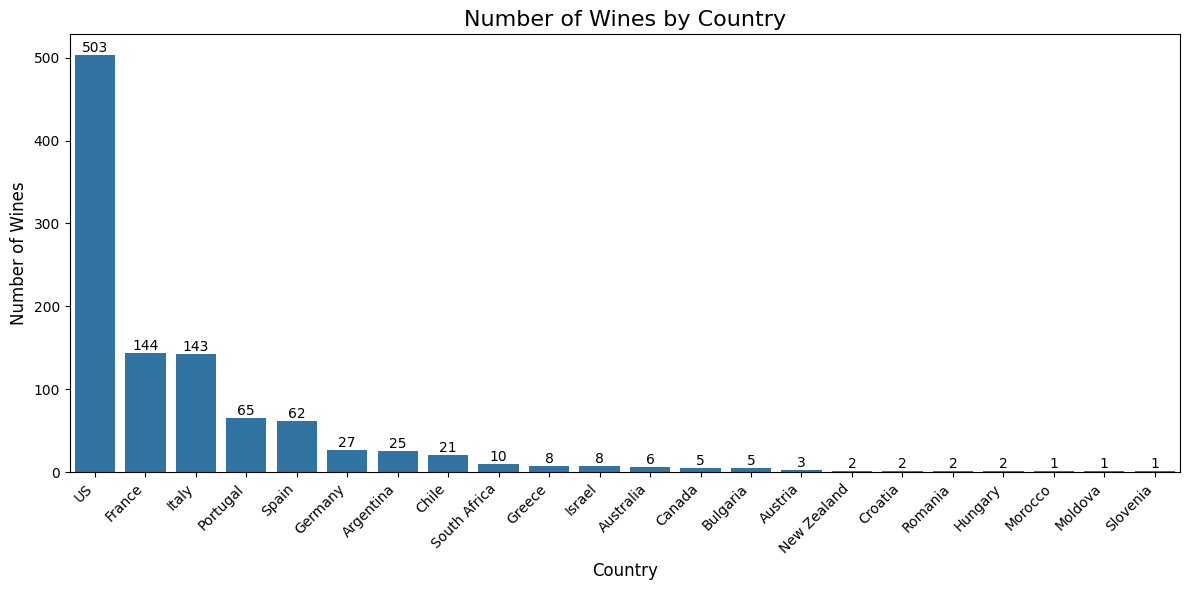

In [16]:
# Count the number of wines per country
wine_counts = wine_df["country"].value_counts()

# Sort the countries by wine count (descending order)
wine_counts_sorted = wine_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=wine_counts_sorted.index, y=wine_counts_sorted.values)

# Customize the plot
plt.title("Number of Wines by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Add value labels on top of each bar
for i, v in enumerate(wine_counts_sorted.values):
    plt.text(i, v, str(v), ha="center", va="bottom")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Summary
This graph seeks to illustrate which countries are the top wine producers. This visual representation may offer investors and end consumers a better insight into where to invest or buy wines. The graph indicates that the top 3 countries that have the most wines are: The United States (US), France and Italy.

#### Relationship between country and variety

In [17]:
# Create a cross-tabulation of country and variety
country_variety_counts = pd.crosstab(wine_df["country"], wine_df["variety"])

# Select top N countries and varieties for better visibility
N = 10
top_countries = wine_df["country"].value_counts().nlargest(N).index
top_varieties = wine_df["variety"].value_counts().nlargest(N).index

# Filter the cross-tabulation
heatmap_data = country_variety_counts.loc[top_countries, top_varieties]


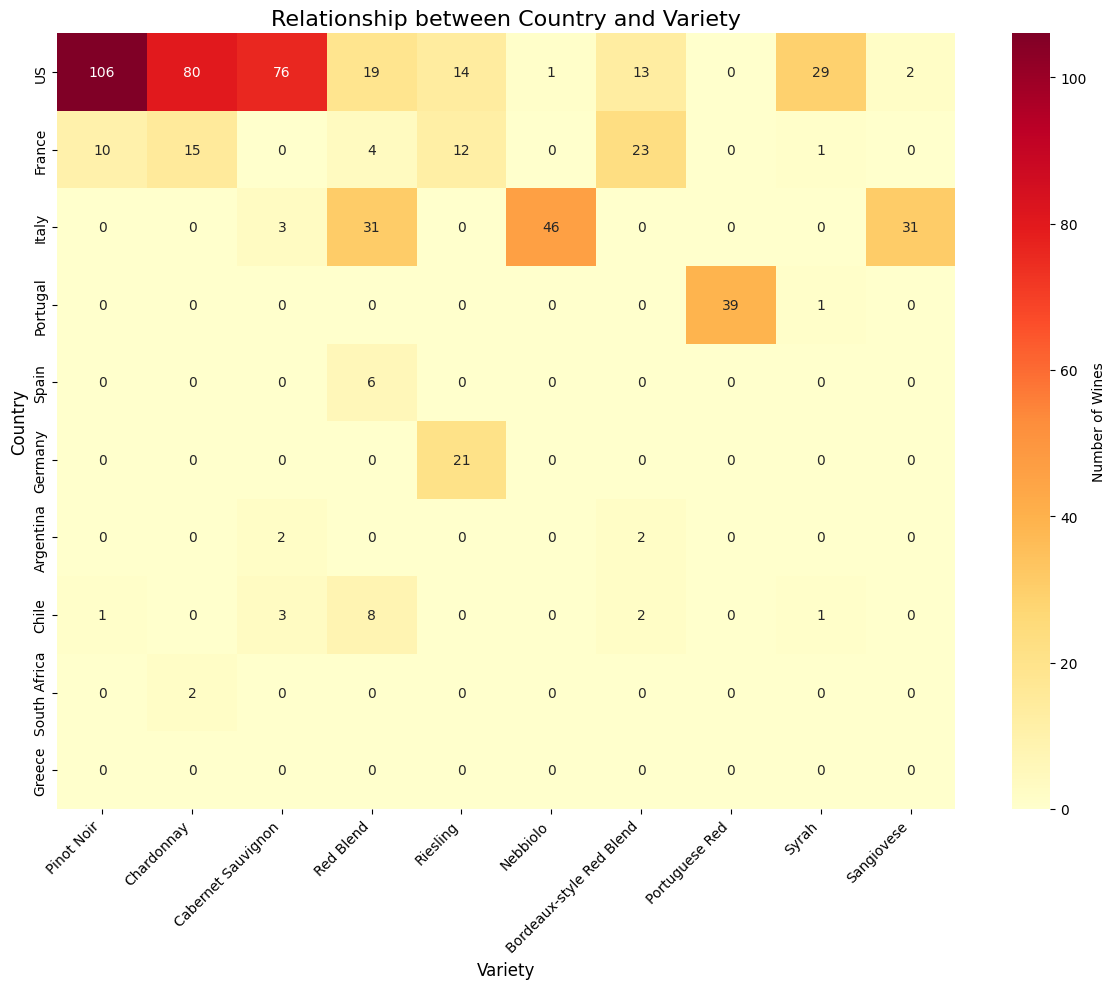

In [18]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", cbar_kws={"label": "Number of Wines"})

# Customize the plot
plt.title("Relationship between Country and Variety", fontsize=16)
plt.xlabel("Variety", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Summary
This heatmap indicates the relationship between wine variety, the country where it is found and the amount on record. An interesting find is that the US has the most Pinot Noir, Chardonnay and Cabernet Sauvignon. France has the most Bordeaux-style red blend, and Italy has the most Nebbiolo. This visualisation could be useful for investors and potential customers to narrow their search for specific wine varieties.

#### Average price of top wine varieties by country

In [19]:
# Determine the top N varieties
N = 10
top_varieties = wine_df["variety"].value_counts().nlargest(N).index

# Filter the dataset for the top varieties
filtered_wine_df = wine_df[wine_df["variety"].isin(top_varieties)]

# Group by country and variety, then calculate the average price
average_price_by_country_variety = filtered_wine_df.groupby(["country", "variety"])["price"].mean().reset_index()

# Sort the DataFrame by average price in descending order
average_price_by_country_variety = average_price_by_country_variety.sort_values(by="price", ascending=False)


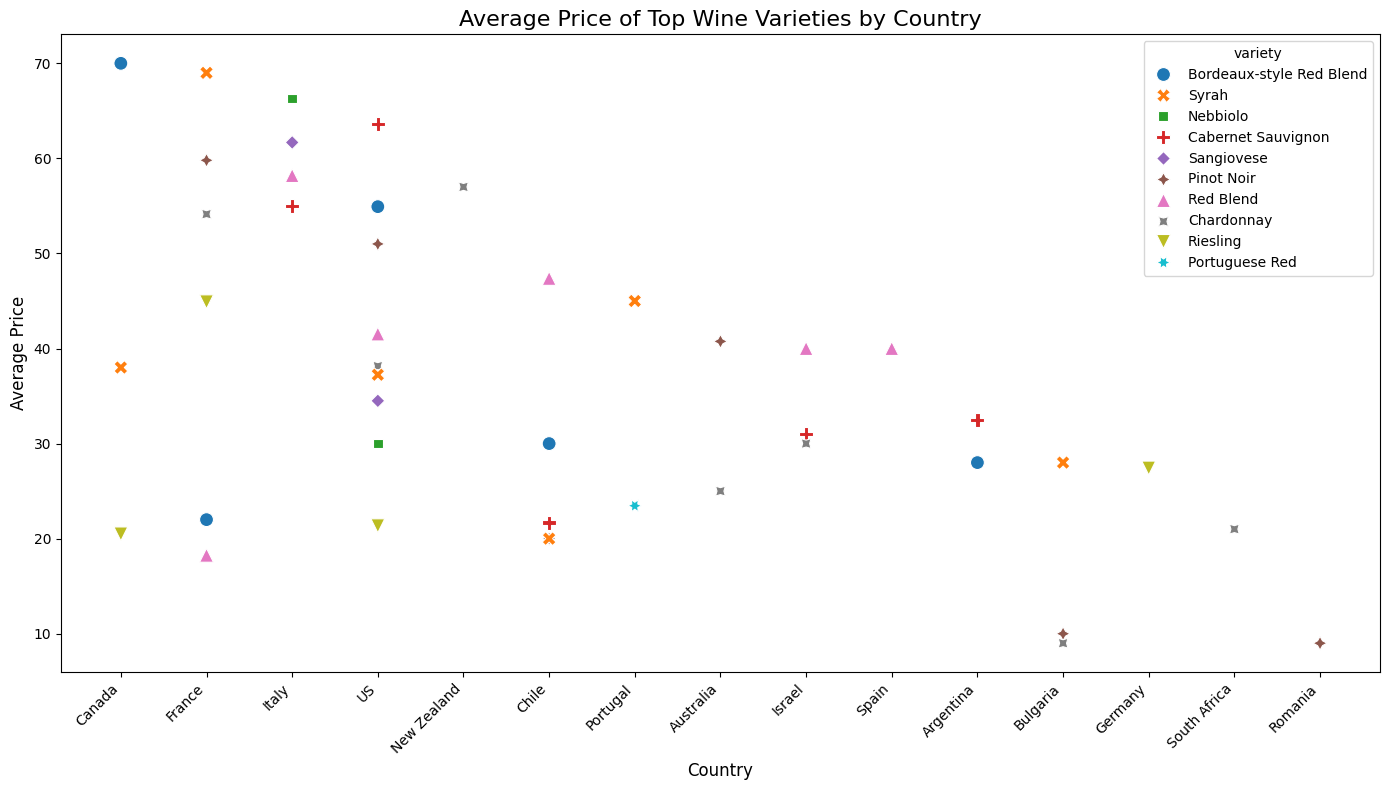

In [20]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a scatter plot
sns.scatterplot(data=average_price_by_country_variety, x="country", y="price", hue="variety", style="variety", s=100)

# Customize the plot
plt.title("Average Price of Top Wine Varieties by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Summary
This scatterplot reveals the typical price of the leading wine types categorized by country. This chart could assist consumers in determining where to search if they are interested in specific wine varieties at competitive rates.

#### Average points for the top wine producing countries

In [21]:
# Count the number of wines per country
wine_counts = wine_df["country"].value_counts()

# Sort the countries by wine count and select the top N
N = 10
top_countries = wine_counts.nlargest(N).index

# Calculate the average points for those top N countries
average_points = wine_df[wine_df["country"].isin(top_countries)].groupby("country")["points"].mean().reset_index()

# Rename the columns for clarity
average_points.columns = ["country", "average_points"]


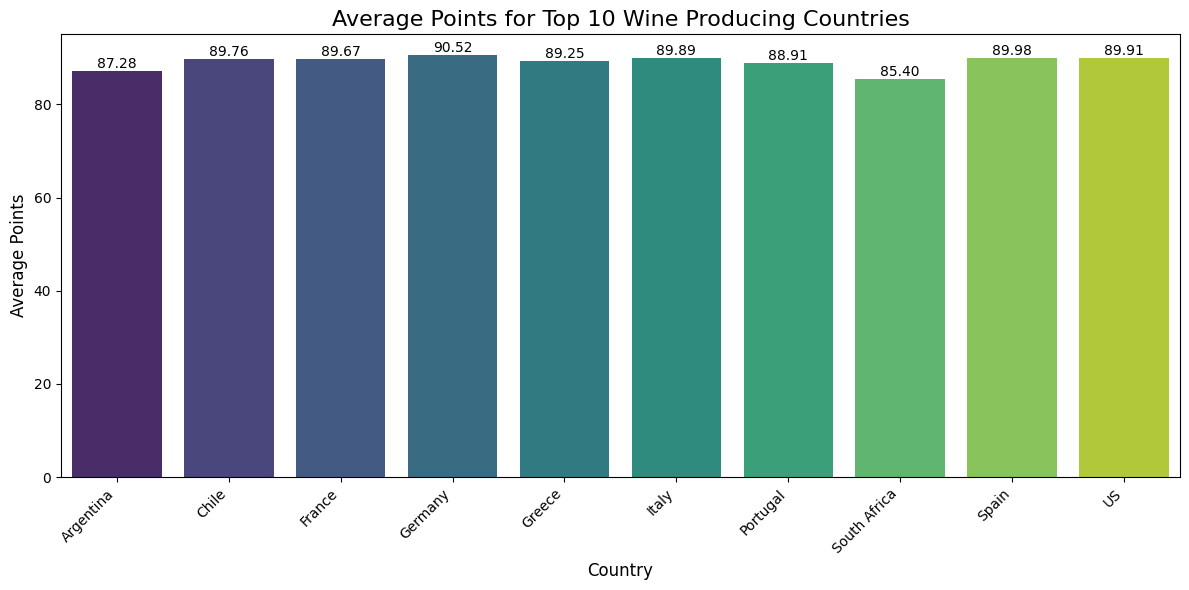

In [22]:
# Visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x="country", y="average_points", data=average_points, hue="country", palette="viridis")

# Customize the plot
plt.title(f"Average Points for Top {N} Wine Producing Countries", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Points", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Add value labels on top of each bar
for i, v in enumerate(average_points["average_points"]):
    plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Summary
This chart illustrates the average scores for the leading wine-producing countries. When contrasted with the countries that produce the largest volume of wines, it indicates that even though certain nations have a significant amount of wine, it does not necessarily imply that their ratings are higher.

#### Top 10 wine producing provinces around the world

In [23]:
# Count the number of wines by province
wine_counts_by_province = wine_df["province"].value_counts().reset_index()
wine_counts_by_province.columns = ["province", "count"]

# Sort the results by count in descending order and select the top 10
top_10_provinces = wine_counts_by_province.nlargest(10, "count")

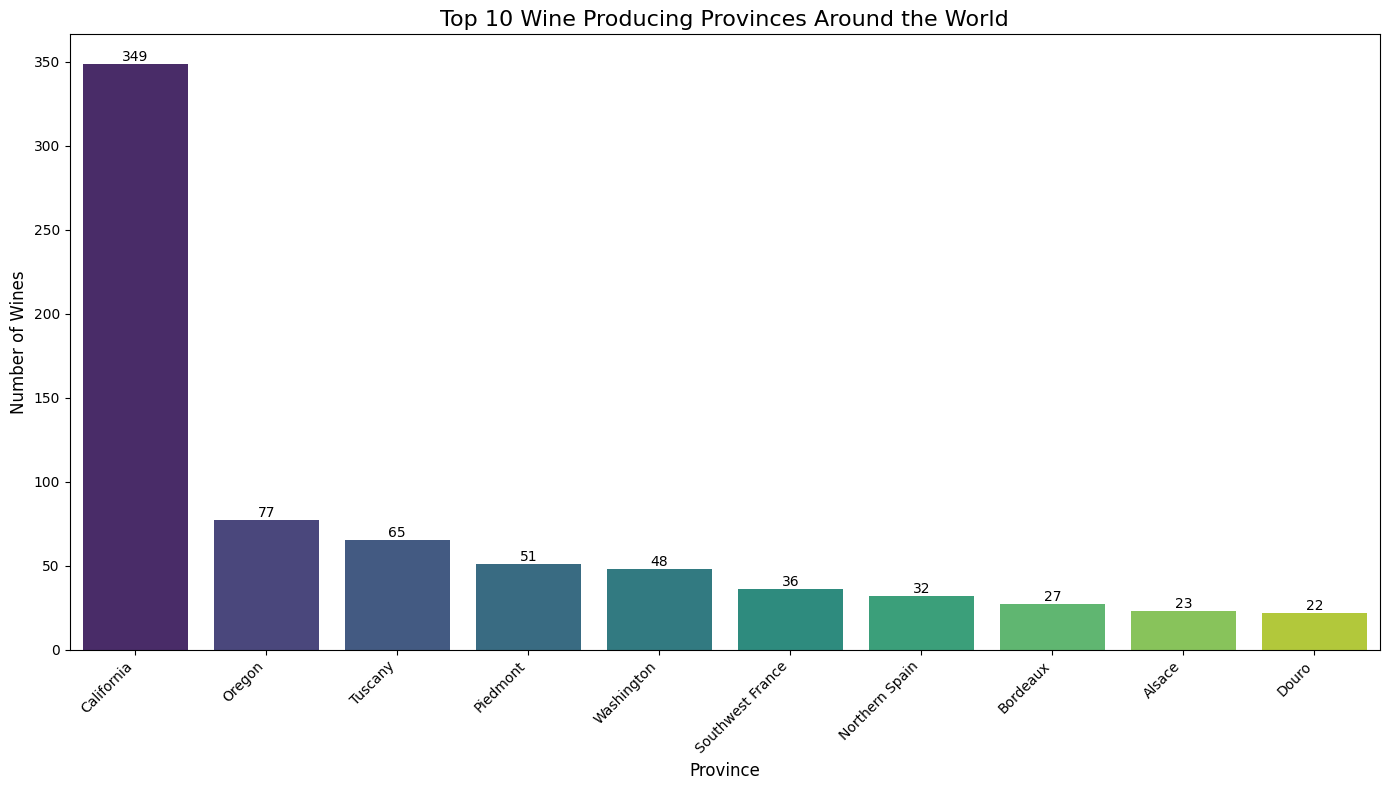

In [24]:
# Create a bar plot for the top 10 provinces
plt.figure(figsize=(14, 8))
sns.barplot(x="province", y="count", data=top_10_provinces, hue="province", palette="viridis")

# Customize the plot
plt.title("Top 10 Wine Producing Provinces Around the World", fontsize=16)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Number of Wines", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Add value labels on top of each bar
for i, v in enumerate(top_10_provinces["count"]):
    plt.text(i, v, str(v), ha="center", va="bottom")

# Remove legend
plt.legend([],[], frameon=False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Summary
This chart illustrates the leading 10 wine-producing provinces around the globe. As the graph indicates, California in the USA stands as the largest producer of wines. This information complements the first graph that examines wine production by country. It provides potential investors and consumers with a clearer insight into where they might refine their search when looking to purchase wine or invest in the sector.

#### Average points and prices by province

In [25]:
# Filter the dataset for the top 10 provinces
top_10_provinces_list = wine_df["province"].value_counts().nlargest(10).index
filtered_wine_df = wine_df[wine_df["province"].isin(top_10_provinces_list)]

# Calculate the average points and prices for these provinces
average_points_prices = filtered_wine_df.groupby("province").agg(
    average_points=("points", "mean"),
    average_price=("price", "mean")
).reset_index()

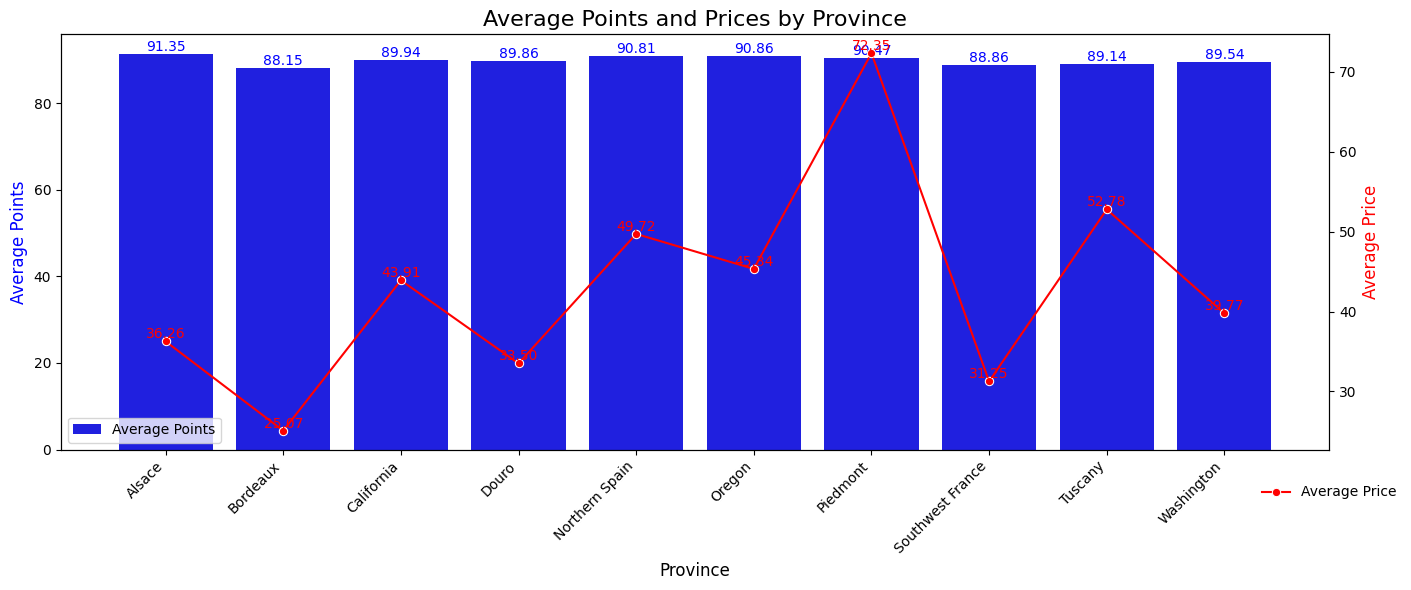

In [26]:
# Set up the matplotlib figure with subplots
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

# Create a bar plot for average points
sns.barplot(x="province", y="average_points", data=average_points_prices, ax=ax1, color="b", label="Average Points")

# Create a line plot for average price on the secondary y-axis
sns.lineplot(x="province", y="average_price", data=average_points_prices, ax=ax2, color="r", marker="o", label="Average Price")

# Customize the plot
ax1.set_title("Average Points and Prices by Province", fontsize=16)
ax1.set_xlabel("Province", fontsize=12)
ax1.set_ylabel("Average Points", fontsize=12, color="b")
ax2.set_ylabel("Average Price", fontsize=12, color="r")

# Set x-ticks and labels
ax1.set_xticks(range(len(average_points_prices["province"])))
ax1.set_xticklabels(average_points_prices["province"], rotation=45, ha="right")

# Add value labels on top of each bar for average points
for i, v in enumerate(average_points_prices["average_points"]):
    ax1.text(i, v, f"{v:.2f}", ha="center", va="bottom", color="b")

# Add value labels for average price
for i, v in enumerate(average_points_prices["average_price"]):
    ax2.text(i, v, f"{v:.2f}", ha="center", va="bottom", color="r")

# Adjust layout
plt.tight_layout()

# Add legend for the average price line at the bottom
ax2.legend(loc="lower center", bbox_to_anchor=(1, -0.15), ncol=1, frameon=False)

# Display the plot
plt.show()

#### Summary
This chart shows the average points and prices of wines across the leading 10 provinces. All ten provinces ranked by points are over the high 80s. The determining factor for deciding where to make purchases would be the average cost. The chart reveals that the most affordable province worth considering is Bordeaux in France, with an average price of 25.07, while the priciest province is Piedmont in Italy, at an average cost of 72.35. This information can guide informed choices when purchasing highly-rated, quality wines.  

#### Top Wineries

In [27]:
# Calculate the average points for each winery
wineries_avg_points = wine_df.groupby("winery")["points"].mean().nlargest(10).reset_index()
wineries_avg_points.columns = ["winery", "average_points"]

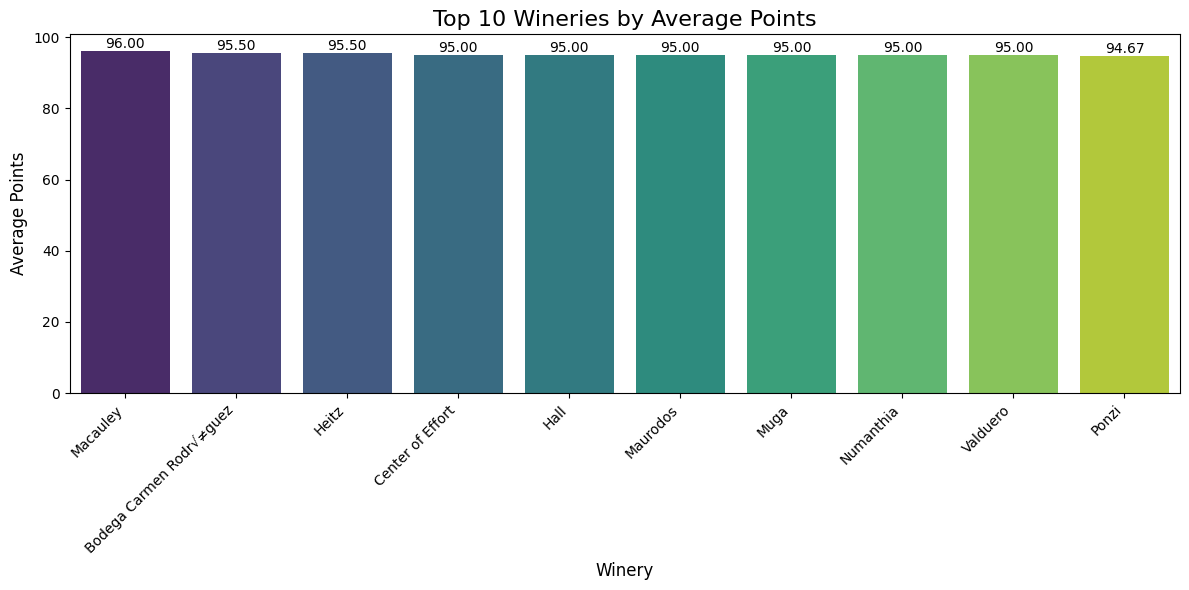

In [28]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot for the average points
sns.barplot(x="winery", y="average_points", data=wineries_avg_points, hue="winery", palette="viridis", dodge=False)

# Customize the plot
plt.title("Top 10 Wineries by Average Points", fontsize=16)
plt.xlabel("Winery", fontsize=12)
plt.ylabel("Average Points", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Add value labels on top of each bar
for i, v in enumerate(wineries_avg_points["average_points"]):
    plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")

# Remove legend
plt.legend([],[], frameon=False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Summary
This chart illustrates the top 10 wineries based on average points. Each winery in this elite group boasts ratings beginning in the mid-90s. Essentially, the wines from these producers are outstanding overall, and investing in these companies is recommended. This representation can assist both investors and consumers in determining which wineries to focus their purchasing or investment efforts.

#### Average price of the top 10 wine varieties

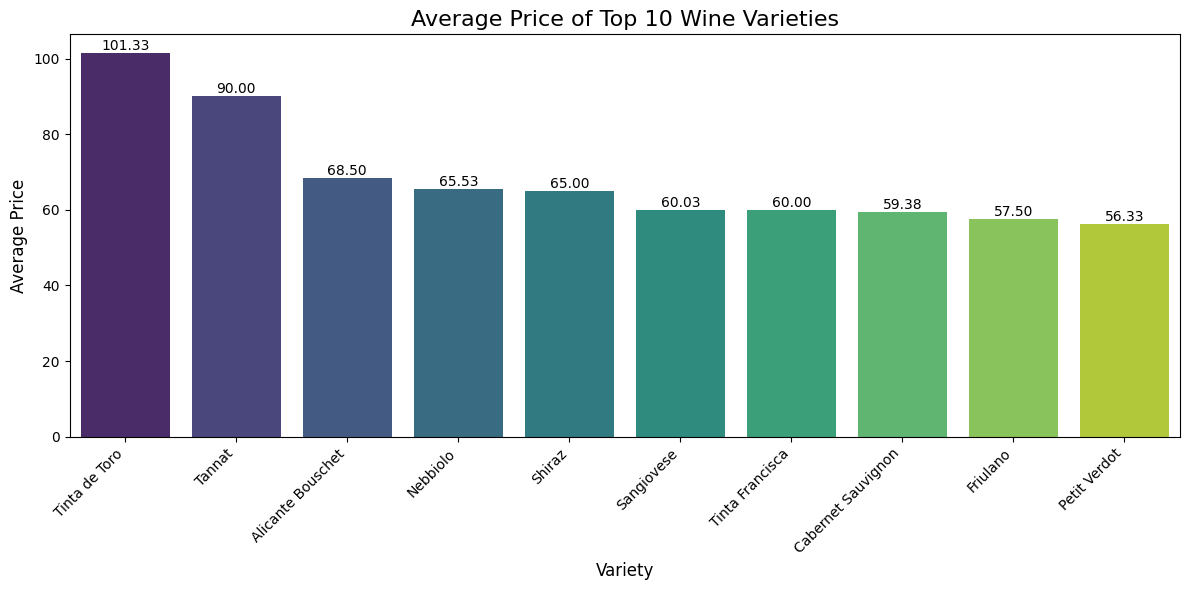

In [29]:
# Calculate average price for each variety
avg_prices = wine_df.groupby("variety")["price"].mean().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, hue=avg_prices.index, palette="viridis")

# Customize the plot
plt.title("Average Price of Top 10 Wine Varieties", fontsize=16)
plt.xlabel("Variety", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Add value labels on top of each bar
for i, v in enumerate(avg_prices.values):
    plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Summary
This figure displays the average price of the top wine varieties. The average price for the wine variety of 'Tinta de Toro' is 101.33 compared to the Petit Verdot at 56. This graph helps the viewer to identify which top varieties might be of interest to them either from and end user or investor's perspective.

### Conclusion
This dataset has provided some valuable insights into the global wine industry. It revealed trends in quantity, quality, pricing and regional features. The US emerged as the top wine producer with California as the top province for wine production. Countries such as France and Italy also showed significant production and came in second and third respectively. This study uncovered the important relationship between countries and specific wine varieties and the difference in pricing and quality ratings across different regions. Notably, the analysis highlights that quantity does not mean quality as some countries that produce fewer wines score higher in quality ratings. The production of top wineries and the price-quality relation by province offers valuable insights for consumers industry professionals and investors alike. These findings are of value to various stakeholders and guide where to find high-quality wines at different price points, investment opportunities and insights for market positioning and product development strategies. In general, this analysis highlights the complex nature of the global wine market and offers a solid foundation for informed decision-making.